In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from dtw import dtw
from numpy.linalg import norm
import scipy.stats as stats
from itertools import permutations, combinations
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [3]:
df = pd.read_csv('../../dataset/cleaned.csv')
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
znorm_data = stats.zscore(df['Global_active_power'].values)
df['Global_active_power'] = znorm_data

In [5]:
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,2.965329,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,4.050626,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,4.063907,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,4.077189,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,2.443552,0.528,235.68,15.8,0.0,1.0,17.0


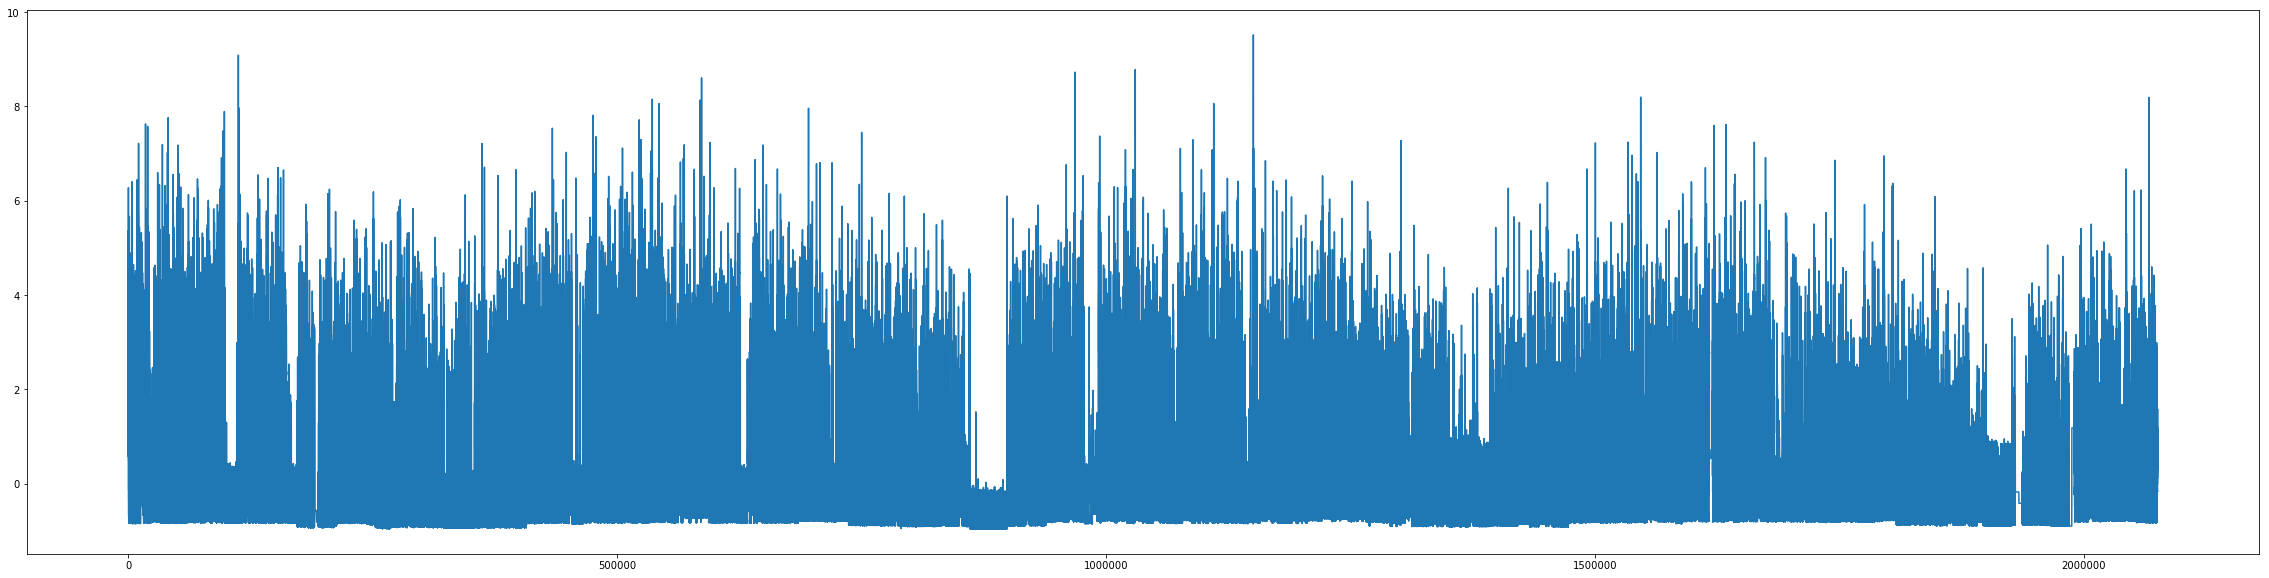

In [6]:
plt.figure(figsize=(40, 10))
plt.plot(df['Global_active_power'])

plt.show()

In [7]:

def fastdtw_dist(x, y, w = -1):
    assert len(x)
    assert len(y)
    
    if np.ndim(x)==1:
        x = x.reshape(-1,1)
    if np.ndim(y)==1:
        y = y.reshape(-1,1)
    r, c = len(x), len(y)
    if(w == -1):
        w = r
    else:
        w = round(w*r)
    D0 = np.zeros((r + 1, c + 1))
    D0[0, 1:] = np.inf
    D0[1:, 0] = np.inf
    D1 = D0[1:, 1:]
    D0[1:,1:] = cdist(x,y,"euclidean")
    for i in range(r):
        for j in range(max(0, i - w), min(c, i + w + 1)):
            temp = []
            if(abs(i + 1 - j) <= w):
                temp.append(D0[i+1, j])
            if(abs(i - j -1) <= w):
                temp.append(D0[i, j+1])
            temp.append(D0[i,j])
            D1[i, j] += min(temp)
    
    return D1[-1, -1] / sum(D1.shape)

In [12]:
k = -1
win = 120     #2 hours window, 50% overlap

ts_len = 6000  #small subset for testing purposes

ts_slices = []
dis_matrix = []
ts_data = df['Global_active_power']
step_size = int(win/2)
break_count = max((((ts_len/win)*1.5)/200), 5)

for z in range(0, ts_len-win, step_size):
    ts_slices.append(ts_data[z:z+win].values)
print("Done Slicing")
print(len(ts_slices))


Done Slicing
98


In [9]:
for i in range(0, len(ts_slices)):
    k += 1
    a = ts_slices[i]
    dis_buffer = []
    dis_buffer[0:k] = [0]*k
    print(i)

    for j in range(k, len(ts_slices)):
        #print(j)
        b = ts_slices[j]
        dt = fastdtw_dist(a, b, 10) 
        #print(dis_buffer)
        #dt = fastdtw(a, b, dist=euclidean)
        dis_buffer.append(round(dt,5))

    dis_matrix.append(dis_buffer)


pd.DataFrame(dis_matrix).to_csv('../../dataset/dist_matrix'+str(win)+'.csv')
df.to_csv('../../dataset/processed.csv', index = False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


In [10]:
j

97

In [11]:
dis_buffer[0:0]

[]